In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import pickle

In [2]:
# Loading the SimCosta data file
wave_SC = np.genfromtxt('C:/Users/guioc/Documents/Art1/SoundSSC/Raw_Data/SIMCOSTA_RS-4_OCEAN_2020-09-17_2020-11-03.tab', delimiter='\t')

# Converting date and time to datetime.datetime
dt = []
dt_stamp = []
for row in wave_SC[12:]:
    dt.append(datetime.datetime(int(row[0]), int(row[1]), int(row[2]), int(row[3]), int(row[4]), int(row[5])))
    dt_stamp.append(datetime.datetime.timestamp(datetime.datetime(int(row[0]), int(row[1]), int(row[2]), int(row[3]), int(row[4]), int(row[5]))))

# Extracting the required columns
wave_h_SC = wave_SC[12:, 10]
wave_t_SC = wave_SC[12:, 9]
wave_dir_SC = wave_SC[12:, 8]


In [3]:
# Loading meteorological data
met_data = np.genfromtxt('C:/Users/guioc/Documents/Art1/SoundSSC/Raw_Data/SIMCOSTA_RS-4_OCEAN_2020-09-17_2020-11-03.csv', delimiter=',')

# Filters out missing or non-numeric data
mask = np.logical_not(np.isnan(met_data))
met_data[mask == False] = np.nan  # Replaces invalid values with NaN for consistency

# Initializes variables to store the desired data range
dt = []
dt_stamp = []
wave_h_SC = []
wave_t_SC = []
wave_dir_SC = []

for row in met_data:
    # Adjusts the time variable
    if np.isnan(row[0]):  # Skips rows where the time data is invalid
        continue
    data = datetime.datetime(int(row[0]), int(row[1]), int(row[2]), int(row[3]), int(row[4]), int(row[5]))
    dt_stamp.append(datetime.datetime.timestamp(data))  # Converts datetime to a timestamp
    dt.append(data)
    
    # Appends wave data to respective lists
    wave_h_SC.append(row[10])  # Wave height
    wave_t_SC.append(row[9])   # Wave period
    wave_dir_SC.append(row[7]) # Wave direction


(18522.160416666666, 18570.11875)

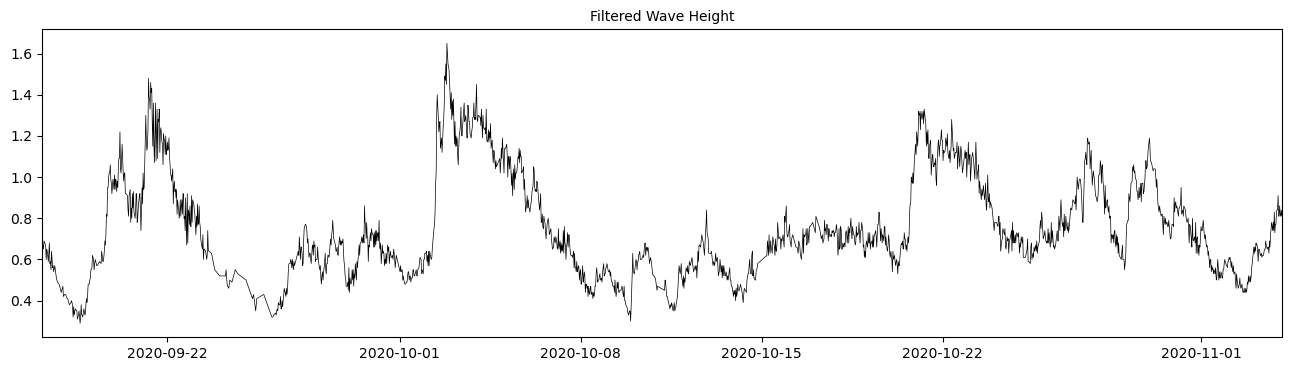

In [4]:
# Creating a figure and axis for the wave height plot
fig, ax = plt.subplots(figsize=(16, 4), dpi=100)

# Setting the plot title
ax.set_title("Filtered Wave Height", fontsize=10)

# Plotting the wave height data
ax.plot(dt, wave_h_SC, linewidth=0.5, color='k')

# Setting the x-axis limits based on the datetime range
ax.set_xlim(np.min(dt), np.max(dt))


(18522.160416666666, 18570.11875)

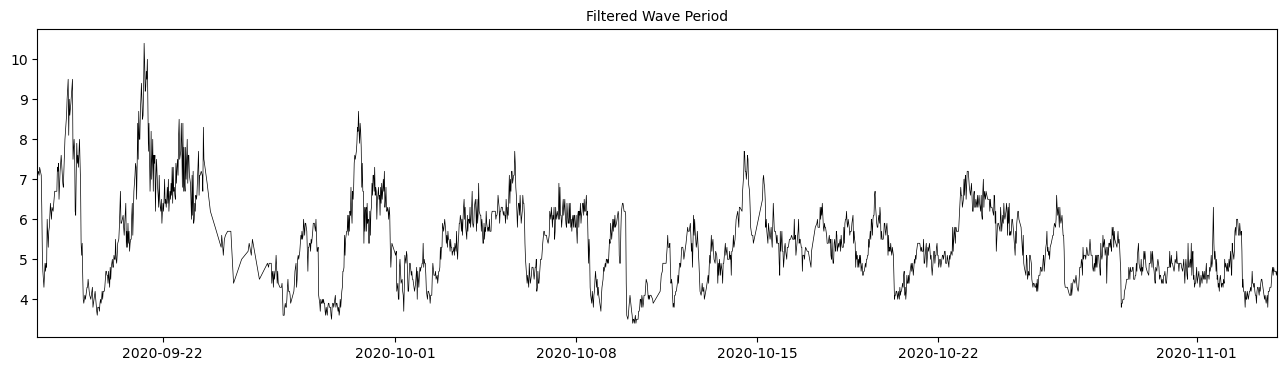

In [5]:
# Creating a figure and axis for the wave period plot
fig, ax = plt.subplots(figsize=(16, 4), dpi=100)

# Setting the plot title
ax.set_title("Filtered Wave Period", fontsize=10)

# Plotting the wave period data
ax.plot(dt, wave_t_SC, linewidth=0.5, color='k')

# Setting the x-axis limits based on the datetime range
ax.set_xlim(np.min(dt), np.max(dt))


In [6]:
# Saving processed data
roots = "C:/Users/guioc/Documents/Art1/SoundSSC/Output_Data/"

# Saving wave period data
with open(roots + 'wave_T_fft.pkl', 'wb') as file:
    pickle.dump(wave_t_SC[12:1777], file)

# Saving wave height data
with open(roots + 'wave_H_fft.pkl', 'wb') as file:
    pickle.dump(wave_h_SC[12:1777], file)

# Saving wave direction data
with open(roots + 'wave_dir_SC.pkl', 'wb') as file:
    pickle.dump(wave_dir_SC[12:1777], file)

# Saving timestamp data
with open(roots + 'wave_dt_stamp.pkl', 'wb') as file:
    pickle.dump(dt_stamp[12:1777], file)

# Saving datetime data
with open(roots + 'wave_dt.pkl', 'wb') as file:
    pickle.dump(dt[12:1777], file)
